In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

since company having maximum missing value we are droping that

In [3]:
df.drop('company',axis=1,inplace=True)

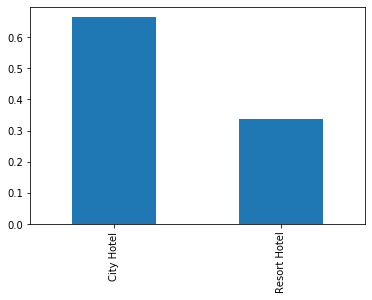

In [13]:
df['hotel'].value_counts(normalize=True).plot(kind='bar')
plt.show()

here we can see that nearly 70% of hotel type is  city when compare to resort hotel

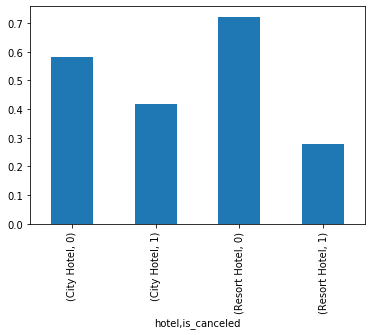

In [18]:
df.groupby('hotel')['is_canceled'].value_counts(normalize=True).plot(kind='bar')
plt.show()

by observing the above graph we can see that maximum cancellation from hotel end is happened in city hotel than resort hotel

In [191]:
df.groupby('is_canceled')['lead_time'].value_counts()

is_canceled  lead_time
0            0            5915
             1            3139
             2            1856
             3            1634
             4            1539
                          ... 
1            397             1
             399             1
             429             1
             435             1
             458             1
Name: lead_time, Length: 887, dtype: int64

by seeing above we can see that approx if lead_time goes too much like more than 300 it leads to cancelation done by hotel end.

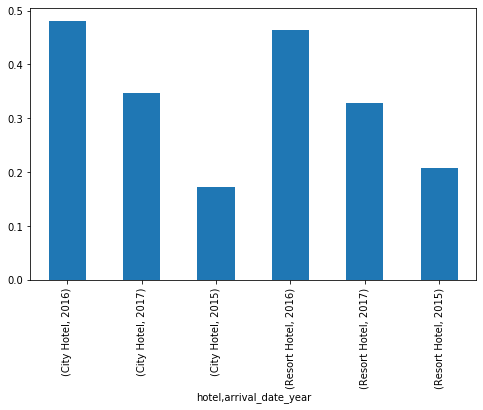

In [32]:
plt.figure(figsize=(8,5))
df.groupby(['hotel'])['arrival_date_year'].value_counts(normalize=True).plot(kind='bar')
plt.show()

where we can see that maximum number of peoples arravied to hotel in both city and resort side are in year of 2016

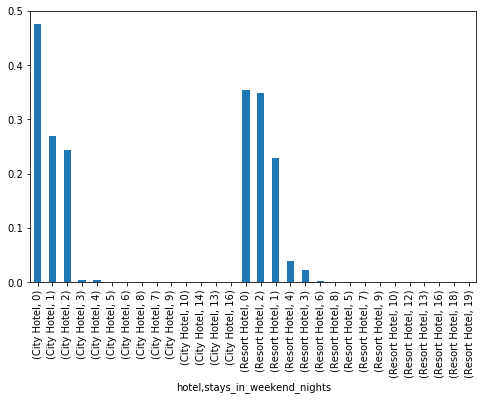

In [33]:
plt.figure(figsize=(8,5))
df.groupby(['hotel'])['stays_in_weekend_nights'].value_counts(normalize=True).plot(kind='bar')
plt.show()

we can see that mostly there is no stay on weekend night in city hotel where as in resort hotel they are more or less equal percentage of no stay are 2day stay 

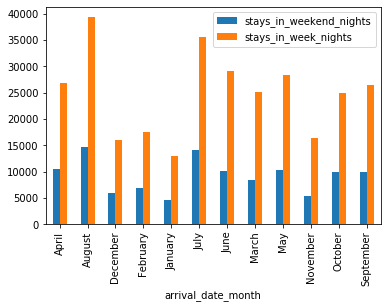

In [203]:
df.groupby(['arrival_date_month'])['stays_in_weekend_nights','stays_in_week_nights'].sum().plot(kind='bar')
plt.show()

In week day nights maximum booking done in August month and in week_end nights maximum booking done in Auguest and July

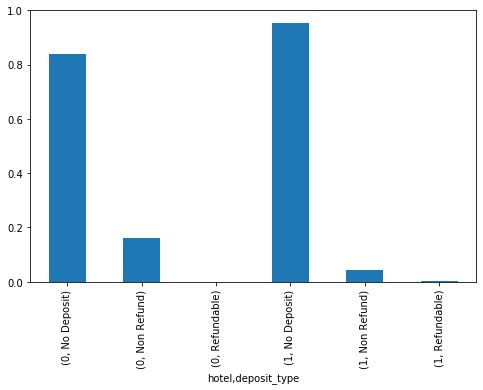

In [67]:
plt.figure(figsize=(8,5))
df.groupby(['hotel'])['deposit_type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

ther are many no refund deposit is in city side and there are many resort hotels are there which requried no deposit

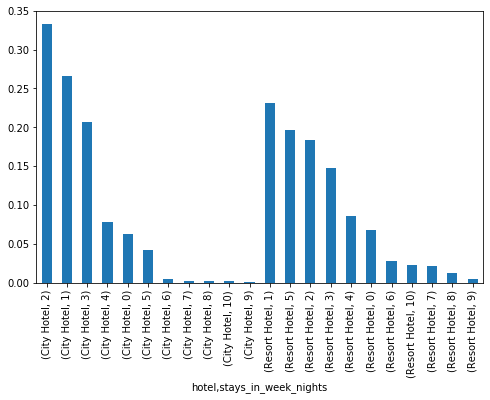

In [38]:
plt.figure(figsize=(8,5))
df[df['stays_in_week_nights']<=10].groupby(['hotel'])['stays_in_week_nights'].value_counts(normalize=True).plot(kind='bar')
plt.show()

1. in week days if there is plan of staying less than 2 or 3 days means most of them planning to stay in city hotel than resort hotel

2. vise versa if there is plan more than 4 days means many prefer to resort hotel than city side hotel

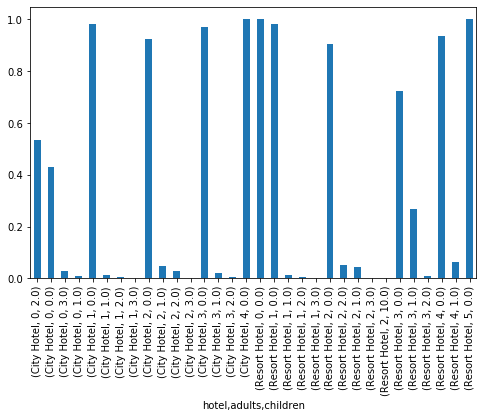

In [43]:
plt.figure(figsize=(8,5))
df[df['adults']<=5].groupby(['hotel','adults'])['children'].value_counts(normalize=True).plot(kind='bar')
plt.show()

there is no major details with family since they are preffering both city and resort hotels

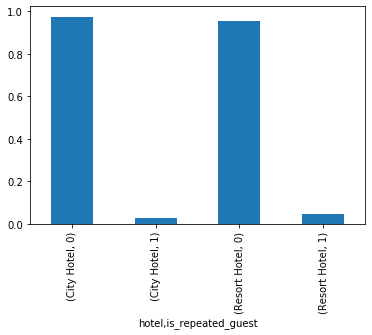

In [44]:
df.groupby('hotel')['is_repeated_guest'].value_counts(normalize=True).plot(kind='bar')
plt.show()

in both case hotel they are very less possibality for repeated guest, might be all the peope in every country are planning to visit different hotel at each time

In [45]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [46]:
df['reservation_status_date'].value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-03-30       1
2015-06-14       1
2015-03-13       1
2015-03-10       1
2015-04-27       1
Name: reservation_status_date, Length: 926, dtype: int64

In [47]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [48]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [54]:
df[df['days_in_waiting_list']>5].groupby('hotel')['days_in_waiting_list'].value_counts()

hotel         days_in_waiting_list
City Hotel    39                      226
              58                      164
              44                      140
              31                      127
              35                       96
                                     ... 
Resort Hotel  93                        1
              105                       1
              109                       1
              116                       1
              142                       1
Name: days_in_waiting_list, Length: 148, dtype: int64

In [86]:
df[df['reserved_room_type'] != df['assigned_room_type']]['assigned_room_type'].count()

14917

only bolow 10% people not get the reserved room type all others got the tyoe which they reserved itself

In [87]:
df[df['previous_cancellations'] != df['previous_bookings_not_canceled']]['previous_bookings_not_canceled'].count()

9391

nearly 8% of people where cancelled previous booking

Transient          3241
Transient-Party    1876
Contract            917
Group                17
Name: customer_type, dtype: int64


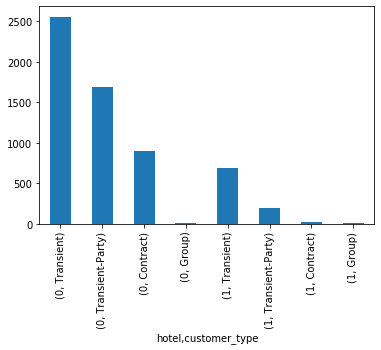

In [94]:
print(df[df['previous_cancellations']==1]['customer_type'].value_counts())
df[df['previous_cancellations']==1].groupby('hotel')['customer_type'].value_counts().plot(kind='bar')
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 65 columns):
hotel                             119390 non-null int32
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
country                           118902 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-

maximum transient type cumstomer are cancelled the perivious booking then the party that to in city hotel only they are maximum cancellasion happend

In [4]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [5]:
df['hotel'] = lr.fit_transform(df['hotel'])

In [6]:
df = pd.get_dummies(df,columns=['reservation_status'],drop_first=True)

In [7]:
df = pd.get_dummies(df,columns=['deposit_type','meal','market_segment','distribution_channel'],drop_first=True)

In [8]:
df = pd.get_dummies(df,columns=['reserved_room_type','assigned_room_type','customer_type'],drop_first=True)

In [9]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
df = df.fillna(df.mode())

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,342,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,1,0,737,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df1 = df.drop(['reservation_status_date'],axis=1)

In [14]:
df2 = df1[df1['country']=='PRT']

In [15]:
df2 = df2.drop('country',axis=1)

In [16]:
df2 = pd.get_dummies(df2,columns=['arrival_date_month'],drop_first=True)

### Classification model regadring with you will get booking or not in PRT

In [162]:
X = df2.drop(['is_canceled'],axis=1)
y = df2['is_canceled']

In [163]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


In [165]:
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(10,40),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='accuracy',n_iter=100,cv=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [166]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 39,
 'min_samples_leaf': 41,
 'min_samples_split': 25,
 'n_estimators': 133}

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
#y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
#y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[14720     0]
 [    0 19293]]
Accuracy score of test:  1.0
Confusion Matrix of test:  [[6351    0]
 [   0 8226]]


So by random forest model we can find that we will get booking or not

In [182]:
df1['country'].mode()

0    PRT
dtype: object

In [183]:
df1['country'] = df1['country'].fillna('PRT')

## Checking for your booking conformed or not with whole data

In [185]:
df3 = pd.get_dummies(df1,columns=['arrival_date_month','country'],drop_first=True)

In [186]:
X = df3.drop(['is_canceled'],axis=1)
y = df3['is_canceled']

In [187]:
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(10,40),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='accuracy',n_iter=100,cv=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=7,
                                                    max_features=39,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=41,
                                                    min_samples_split=25,
                                                    min_weight_fraction_leaf=0.0,
                    

In [188]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 32,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 101}

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
#y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
#print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
#y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
#print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[52512     0]
 [    0 31061]]
Accuracy score of test:  1.0
Confusion Matrix of test:  [[22654     0]
 [    0 13163]]
